* Import google drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


* Import otto folder from my drive

In [ ]:
import os
os.chdir("/gdrive/My Drive/otto")

In [ ]:
import pandas as pd 
import numpy as np

test=pd.read_csv("test.csv")
test.head()
train=pd.read_csv("train.csv")
train.head()
test1=test.drop(['id'],axis=1)
test1.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,...,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,0,0,0,3,2,1,0,0,0,0,0,0,0,5,3,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,2,0,4,0,4,0,0,0,0,2,0,0,0,8,0,0,0,0,0,...,24,0,0,0,0,0,0,0,0,0,6,8,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,2,0,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,7,1,0,0,0,7,0,2,0,0,0,4,0,0,0,1,1,2,0,0,0,0,0,0,1,0,0,2,0,0,...,10,1,0,2,0,0,1,6,1,1,0,0,1,1,1,2,0,0,2,0,0,0,0,0,0,0,6,0,2,0,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,21,3,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,0,9,0,0,2,0,0,0,0,6,0,8,0,0,0,0,1,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,4,0,5,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9,0,0


In [ ]:
X=train.iloc[:,1:-1]
X.head()


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,...,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,...,3,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
y=train['target']
y.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

 * TRAIN TEST SPLIT

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2020,
                                                    stratify=y)

# Linear Discriminant Analysis
* Linear Discriminant Analysis is dimensionlity reduction technique used as preprocessing step in machine learning and pattern classifications applications.

In [ ]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
y_pred = lda.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

[[ 286  119    0    0    0   19   11   72   72]
 [  16 3999  722   19   36    4   27   11    3]
 [   0 1471  855   16   10    0   45    3    1]
 [   2  586  104   81    4   13   15    2    0]
 [   0  142    4    0  673    0    0    3    0]
 [  84  301   16    3    1 3644   38   95   59]
 [  42  249   66    2    1   17  423   50    2]
 [ 143  240   25    0    1   51   15 2030   34]
 [ 145  198    0    3    0   30    8   47 1055]]
              precision    recall  f1-score   support

     Class_1       0.40      0.49      0.44       579
     Class_2       0.55      0.83      0.66      4837
     Class_3       0.48      0.36      0.41      2401
     Class_4       0.65      0.10      0.17       807
     Class_5       0.93      0.82      0.87       822
     Class_6       0.96      0.86      0.91      4241
     Class_7       0.73      0.50      0.59       852
     Class_8       0.88      0.80      0.84      2539
     Class_9       0.86      0.71      0.78      1486

    accuracy             


# Quadratic Discriminant Analysis (QDA)

* A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

* The model fits a Gaussian density to each class.

In [ ]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
y_pred = qda.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


[[ 245   36    9   14   31   27   29   29  159]
 [  11 3483  499  392  284   11  101   20   36]
 [   3 1224  709  259  102    2   84   13    5]
 [   0  256   37  421   50    7   24    1   11]
 [   0   37    2    8  766    5    3    0    1]
 [ 118   57   45  158   33 3405  146   84  195]
 [  30   84   99   71   23   20  495   19   11]
 [ 287   29   38   10   26   89  145 1597  318]
 [  81   50    8   27   53   38    7   13 1209]]
              precision    recall  f1-score   support

     Class_1       0.32      0.42      0.36       579
     Class_2       0.66      0.72      0.69      4837
     Class_3       0.49      0.30      0.37      2401
     Class_4       0.31      0.52      0.39       807
     Class_5       0.56      0.93      0.70       822
     Class_6       0.94      0.80      0.87      4241
     Class_7       0.48      0.58      0.52       852
     Class_8       0.90      0.63      0.74      2539
     Class_9       0.62      0.81      0.70      1486

    accuracy             

# Scaling
* Standardize features by removing the mean and scaling to unit variance

* The standard score of a sample x is calculated as:

   z = (x - u) / s
* Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
Xscaled=scaler.transform(X)
Xscaled[1:5]



array([[-0.25350808, -0.21010603, -0.30716546, -0.27944276, -0.1618665 ,
        -0.11933088, -0.18804484,  0.14964747, -0.29103777, -0.24360641,
        -0.41181516, -0.24841812, -0.23873688, -0.53638751, -0.3325557 ,
        -0.63493568, -0.24780121,  1.06632116, -0.11900038, -0.32774011,
        -0.29310534, -0.50474642, -0.18202722, -0.57115854, -0.65775234,
        -0.32924691, -0.242452  , -0.28857473, -0.14504369, -0.09160521,
        -0.16568799, -0.43188648, -0.53161372, -0.28095119, -0.20834123,
        -0.27751917,  0.97283808, -0.36324836, -0.14722318, -0.50096182,
        -0.27952313, -0.35591894, -0.26444665, -0.41663924, -0.09204472,
        -0.2731184 , -0.17263883, -0.6150026 , -0.25436135, -0.18848682,
        -0.10373056, -0.20433451, -0.22031906, -0.50384669, -0.32352896,
        -0.15774054, -0.28564558,  0.0758166 , -0.15075752, -0.34008544,
        -0.2356121 , -0.44532697, -0.17818492, -0.07548256, -0.28379903,
        -0.41979668, -0.38149297, -0.2231081 , -0.1

# Principal Component Analysis (PCA)
* Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space.

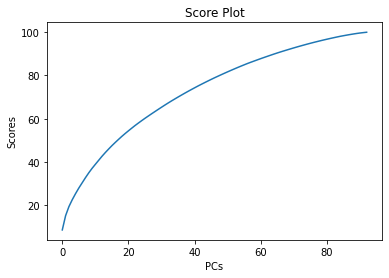

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'auto')
principalComponents = pca.fit_transform(Xscaled)

# Cumulative Sum
Cumu_Variation =np.cumsum(pca.explained_variance_ratio_ * 100)

import matplotlib.pyplot as plt
plt.plot(list(range(0,93)),Cumu_Variation)
plt.xlabel("PCs")
plt.ylabel("Scores")
plt.title('Score Plot')
plt.show()

# RandomForestClassifier
* RANDOM FOREST is an ensembled learning approach multiple productive models are developed and result are aggreated to improve precision .
* Ouecomes is considered as per majority in different trees.
* Creats a set of Decision Trees from randomly selected subset of training set
It then aggreagates the votes from different desicion trees to descrete final class of test object.

Feature: 0, Score: 0.00699
Feature: 1, Score: 0.00436
Feature: 2, Score: 0.01260
Feature: 3, Score: 0.01157
Feature: 4, Score: 0.00192
Feature: 5, Score: 0.00090
Feature: 6, Score: 0.00348
Feature: 7, Score: 0.01488
Feature: 8, Score: 0.01256
Feature: 9, Score: 0.00404
Feature: 10, Score: 0.04209
Feature: 11, Score: 0.00237
Feature: 12, Score: 0.00605
Feature: 13, Score: 0.03407
Feature: 14, Score: 0.02608
Feature: 15, Score: 0.01151
Feature: 16, Score: 0.00936
Feature: 17, Score: 0.00589
Feature: 18, Score: 0.00500
Feature: 19, Score: 0.00653
Feature: 20, Score: 0.00383
Feature: 21, Score: 0.00616
Feature: 22, Score: 0.00318
Feature: 23, Score: 0.01963
Feature: 24, Score: 0.02777
Feature: 25, Score: 0.02756
Feature: 26, Score: 0.01356
Feature: 27, Score: 0.00336
Feature: 28, Score: 0.00460
Feature: 29, Score: 0.00937
Feature: 30, Score: 0.00167
Feature: 31, Score: 0.01296
Feature: 32, Score: 0.01166
Feature: 33, Score: 0.04656
Feature: 34, Score: 0.00810
Feature: 35, Score: 0.01800
Fe

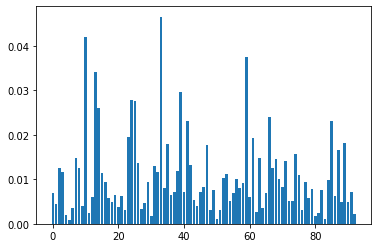

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
model = RandomForestClassifier()

model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# RANDOM FOREST model fit 

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[ 224   18    3    0    1   55   18  134  126]
 [   0 4287  458   26    3    9   31   14    9]
 [   0 1209 1129   24    0    4   30    3    2]
 [   1  328  108  327    3   31    8    1    0]
 [   1   22    1    0  792    3    2    1    0]
 [  13   51    5    3    1 4009   32   83   44]
 [  10  106   72    8    6   63  478  100    9]
 [  16   26   12    0    0   77   12 2350   46]
 [  27   34    0    0    1   53   10   57 1304]]
              precision    recall  f1-score   support

     Class_1       0.77      0.39      0.51       579
     Class_2       0.70      0.89      0.79      4837
     Class_3       0.63      0.47      0.54      2401
     Class_4       0.84      0.41      0.55       807
     Class_5       0.98      0.96      0.97       822
     Class_6       0.93      0.95      0.94      4241
     Class_7       0.77      0.56      0.65       852
     Class_8       0.86      0.93      0.89      2539
     Class_9       0.85      0.88      0.86      1486

    accuracy             

# Support Vector Classification.
* The Support Vector Classification algorithm creates line or hyperplane which separate the data into classes.
* A Hyperplane in n-dimensional euclideum space is a flat ,n-dimensional subset of that space divides the space into two disconnected parts.

In [ ]:
from sklearn.svm import SVC

svc = SVC(probability = True,kernel='rbf')
fitSVC = svc.fit(X_train, y_train)
y_pred = fitSVC.predict(X_test)



In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

[[ 259   25    0    0    1   41   18  109  126]
 [   4 4415  322   16   15   10   33   13    9]
 [   1 1653  688    8    0    6   38    5    2]
 [   0  489   74  198    4   34    6    2    0]
 [   0   37    1    0  779    2    0    3    0]
 [  22   57    3    5    1 3955   44   90   64]
 [  20  135   46    0    5   48  535   59    4]
 [  45   46    7    0    1   57   16 2331   36]
 [  35   29    1    0    0   46   13   75 1287]]
              precision    recall  f1-score   support

     Class_1       0.67      0.45      0.54       579
     Class_2       0.64      0.91      0.75      4837
     Class_3       0.60      0.29      0.39      2401
     Class_4       0.87      0.25      0.38       807
     Class_5       0.97      0.95      0.96       822
     Class_6       0.94      0.93      0.94      4241
     Class_7       0.76      0.63      0.69       852
     Class_8       0.87      0.92      0.89      2539
     Class_9       0.84      0.87      0.85      1486

    accuracy             

# XGBOOST Classifier
* Boosting refers to a family of algorithm which converts weak learner to strong learner.
* Weak learner is less prececision and Strong learner is more precision.

In [ ]:
from xgboost import XGBClassifier

clf = XGBClassifier(random_state=2000)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[ 194   37    5    0    2   60   22  119  140]
 [   1 4252  462   39   11   13   29   20   10]
 [   3 1433  880   28    0    7   40    7    3]
 [   0  406   86  264    4   31   13    3    0]
 [   0   37    0    0  782    2    0    1    0]
 [  16   73   13    2    2 3936   38   97   64]
 [  22  136   57    9    5   59  471   89    4]
 [  30   57   18    0    1   86   16 2283   48]
 [  39   63    2    0    2   60    8   84 1228]]
              precision    recall  f1-score   support

     Class_1       0.64      0.34      0.44       579
     Class_2       0.65      0.88      0.75      4837
     Class_3       0.58      0.37      0.45      2401
     Class_4       0.77      0.33      0.46       807
     Class_5       0.97      0.95      0.96       822
     Class_6       0.93      0.93      0.93      4241
     Class_7       0.74      0.55      0.63       852
     Class_8       0.84      0.90      0.87      2539
     Class_9       0.82      0.83      0.82      1486

    accuracy             

# DECISION TREE CLASSIFIER 
 * The goal of DECISION TREE CLASSIFIER is to split data into groups such as every element in one group belong to the same category.
 * DECISION TREE CLASSIFIER create a set of binary split on the predictor variables.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decit=DecisionTreeClassifier(random_state=2020)
decit.fit(X_train,y_train)

y_pred = decit.predict(X_test)


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[ 222   28    8    2    6   65   34  111  103]
 [  22 3366  913  277   19   46   84   55   55]
 [  13  930 1165  152    4   19   75   20   23]
 [   3  228  154  340    4   37   22    7   12]
 [   1   21    7    3  774    4    2    4    6]
 [  67   52   40   51    3 3722   65  128  113]
 [  50  103   74   28    7   70  407   81   32]
 [  97   61   39   15    8  127   96 2019   77]
 [ 113   51   18   14    4   69   37   91 1089]]
              precision    recall  f1-score   support

     Class_1       0.38      0.38      0.38       579
     Class_2       0.70      0.70      0.70      4837
     Class_3       0.48      0.49      0.48      2401
     Class_4       0.39      0.42      0.40       807
     Class_5       0.93      0.94      0.94       822
     Class_6       0.89      0.88      0.89      4241
     Class_7       0.50      0.48      0.49       852
     Class_8       0.80      0.80      0.80      2539
     Class_9       0.72      0.73      0.73      1486

    accuracy             

# import seaborn
* Seaborn is a Python data visualization library based on matplotlib. 
* It provides a high-level interface for drawing attractive and informative statistical graphics.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Product features
* Plot summation for every product feature

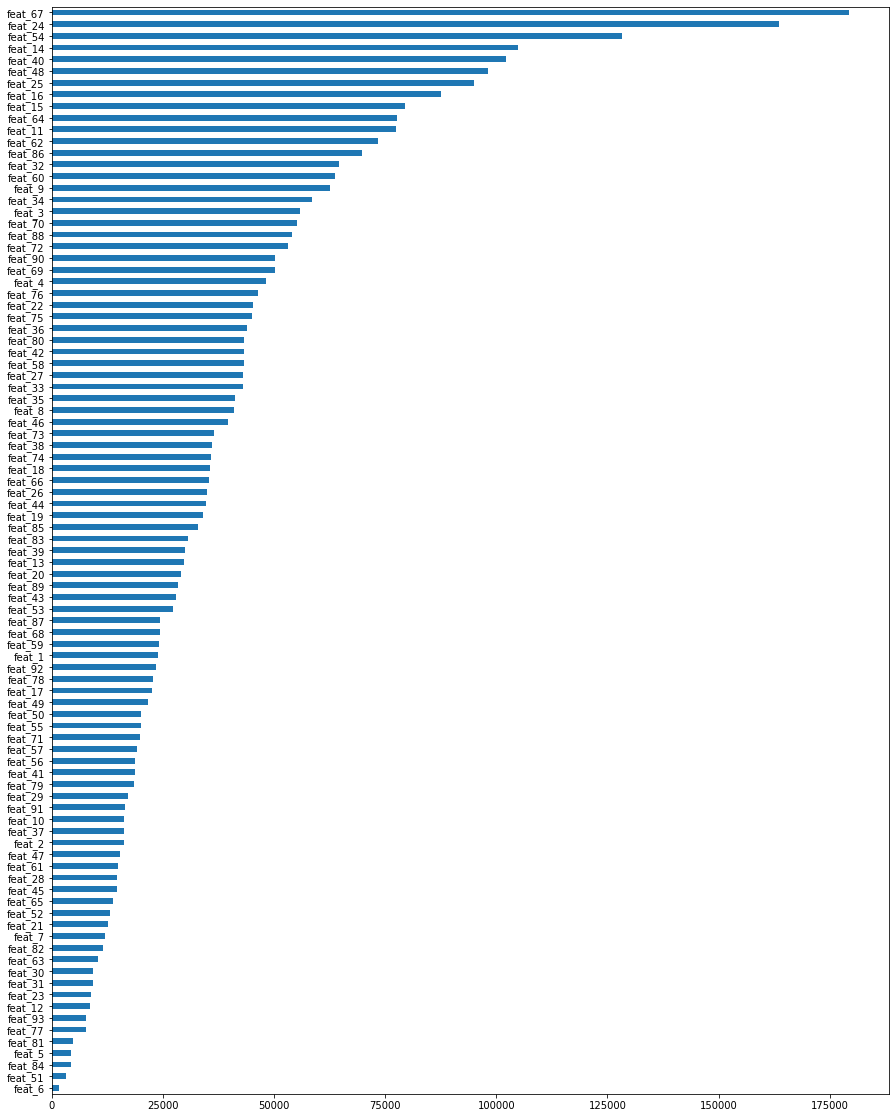

In [40]:

sum_otto = train.sum()
sum_otto.drop(['target', 'id']).sort_values().plot(kind='barh', figsize=(15,20))

# target

* Map each class to numerical value from 0 to 8(i.e. 9 classes)
* Countplot of Classes i.e target

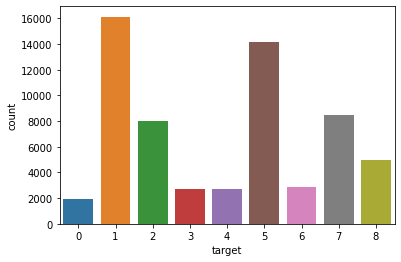

In [39]:

range_of_classes = range(1, 10)
map_values_dic   = {}

for n in range_of_classes:
    map_values_dic['Class_{}'.format(n)] = n - 1

train['target'] = train['target'].map(map_values_dic)

# Plot
sns.countplot(x='target', data=train)